<a href="https://colab.research.google.com/github/Stonetenth2005/Machine-Learning/blob/main/11-Disctretization/Discretization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.dropna(inplace=True)

In [ ]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Training a decision tree without binning

In [ ]:
dt = DecisionTreeClassifier()

dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)

accuracy_score(Y_test, Y_pred)

0.6363636363636364

In [ ]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, Y, cv=10, scoring='accuracy'))

np.float64(0.6303012519561815)

In [ ]:
kbin_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [ ]:
trf = ColumnTransformer(transformers=[
    ('bin_age', kbin_age, ['Age']),
    ('bin_fare', kbin_fare, ['Fare'])
])

In [ ]:
X_test_transformed = trf.fit_transform(X_test)
X_train_transformed = trf.transform(X_train)

In [ ]:
trf.named_transformers_['bin_age'].n_bins_

array([10])

In [ ]:
trf.named_transformers_['bin_age'].bin_edges_

array([array([ 0.42, 13.2 , 20.  , 23.  , 26.  , 29.  , 33.  , 36.  , 40.  ,
              50.  , 65.  ])                                                ],
      dtype=object)

In [ ]:
output = pd.DataFrame({
    'Age':X_test['Age'],
    'Age_Transformed':X_test_transformed[:,0],
    'Fare':X_test['Fare'],
    'Fare_Transformed':X_test_transformed[:,1]
})

output

,Age,Age_Transformed,Fare,Fare_Transformed
423,28.00,4.0,14.4000,4.0
177,50.00,9.0,28.7125,6.0
305,0.92,0.0,151.5500,9.0
292,36.00,7.0,12.8750,3.0
889,26.00,4.0,30.0000,6.0
...,...,...,...,...
308,30.00,5.0,24.0000,5.0
379,19.00,1.0,7.7750,0.0
123,32.50,5.0,13.0000,4.0
471,38.00,7.0,8.6625,2.0


# Training decision tree with Discretization

In [ ]:
dt = DecisionTreeClassifier()

dt.fit(X_train_transformed, Y_train)
Y_pred = dt.predict(X_test_transformed)

accuracy_score(Y_test, Y_pred)

0.6363636363636364

In [ ]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, Y, cv=10, scoring='accuracy'))

np.float64(0.6288732394366197)

In [ ]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6317292644757433


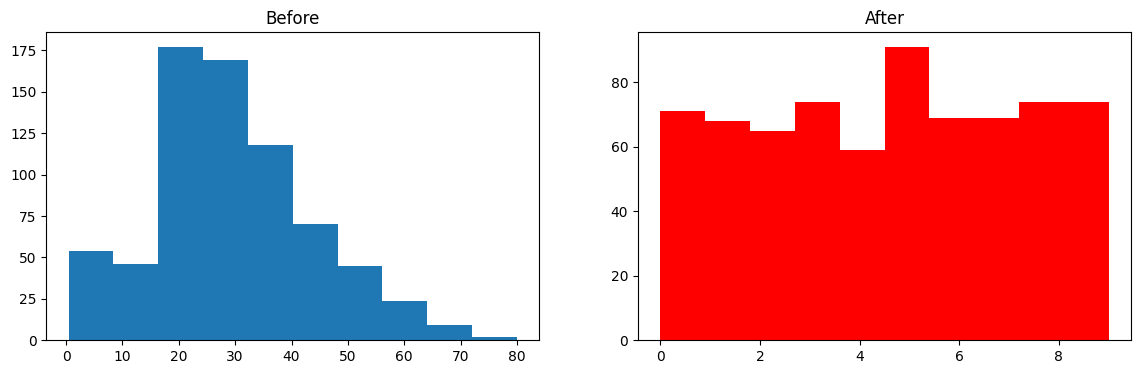

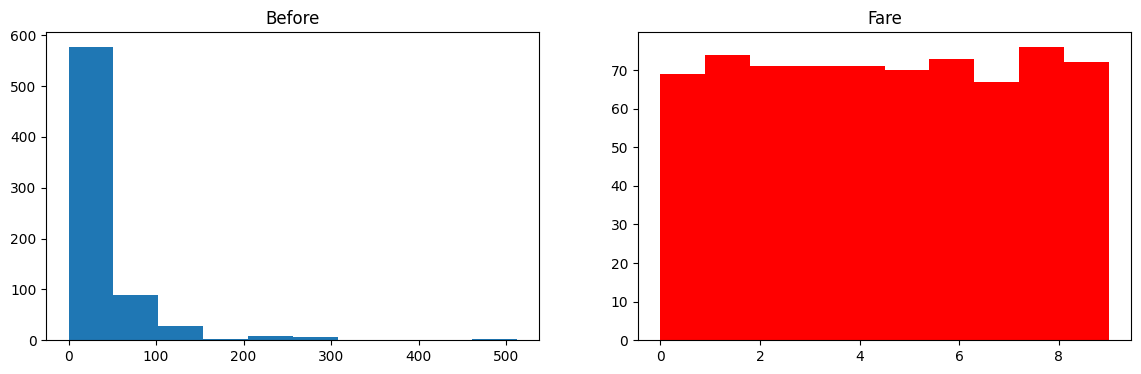

In [ ]:
discretize(10,'quantile')